In [1]:
import qiskit as q
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from matplotlib import style
import math
#style.use("dark_background")
%matplotlib inline

qasm_sim = q.Aer.get_backend('qasm_simulator')
statevec_sim = q.Aer.get_backend("statevector_simulator")

In [2]:
c = q.QuantumCircuit(2,2)
c.ry(math.pi/4,0)
c.ry(math.pi/4,1)
orig_statevec = q.execute(c, backend=statevec_sim).result().get_statevector()
c.measure([0,1], [0,1]) # measuring qubit 3, which is impacted by those cnots:
c.draw()

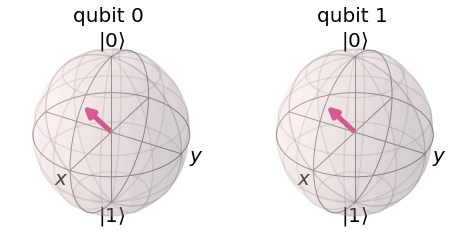

In [3]:
plot_bloch_multivector(orig_statevec)

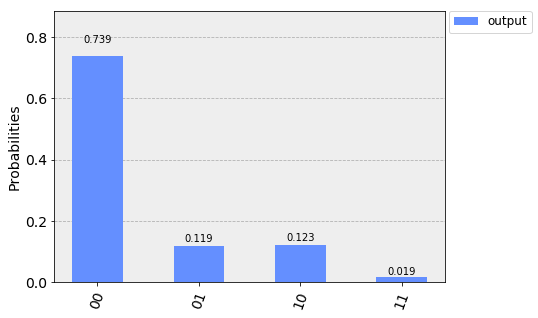

In [4]:
orig_counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([orig_counts], legend=['output'])

In [5]:
c = q.QuantumCircuit(2,2)
c.h(0)
c.h(1)
c.ry(math.pi/4,0)
c.ry(math.pi/4,1)
statevec = q.execute(c, backend=statevec_sim).result().get_statevector()
c.measure([0,1], [0,1]) # measuring qubit 3, which is impacted by those cnots:
c.draw()

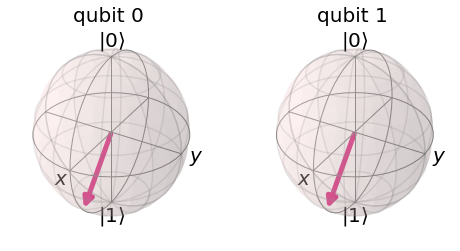

In [6]:
plot_bloch_multivector(statevec)

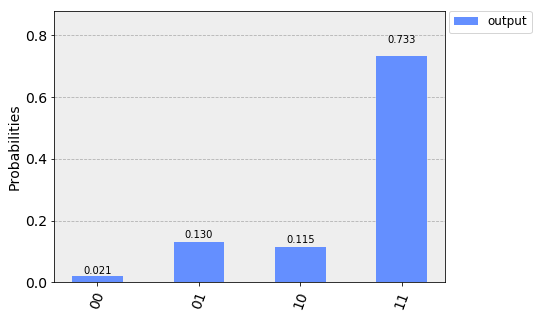

In [7]:
counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts], legend=['output'])

In [8]:
c = q.QuantumCircuit(2,2)
c.h(0)
c.h(1)
c.ry(math.pi/4,0)
c.ry(math.pi/4,1)
c.h(0)
c.h(1)
statevec = q.execute(c, backend=statevec_sim).result().get_statevector()
c.measure([0,1], [0,1]) # measuring qubit 3, which is impacted by those cnots:
c.draw()

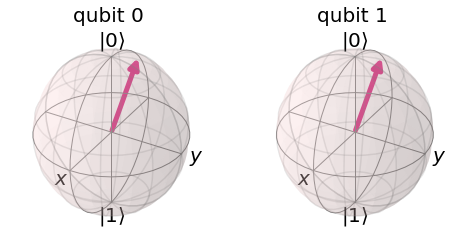

In [9]:
plot_bloch_multivector(statevec)

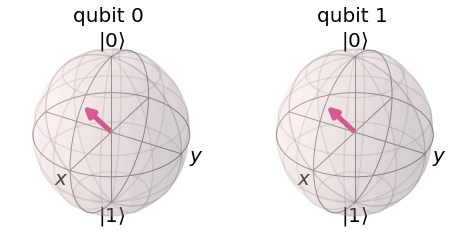

In [10]:
plot_bloch_multivector(orig_statevec)

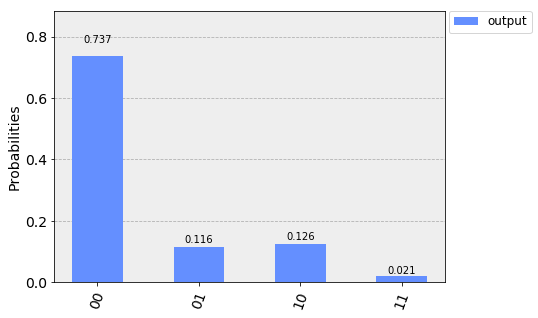

In [11]:
counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts], legend=['output'])

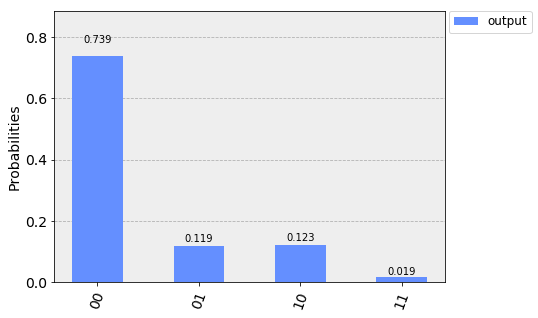

In [13]:
plot_histogram([orig_counts], legend=['output'])

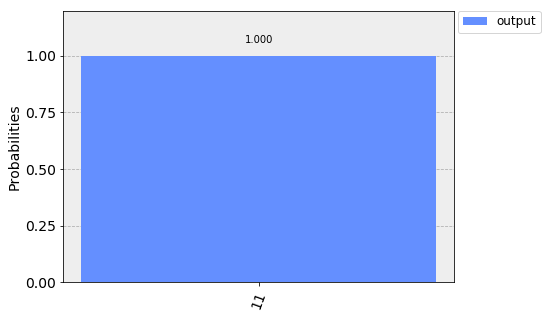

In [14]:
c = q.QuantumCircuit(2,2)
c.x(0)
c.x(1)
orig_statevec = q.execute(c, backend=statevec_sim).result().get_statevector()
c.measure([0,1], [0,1]) # measuring qubit 3, which is impacted by those cnots:
orig_counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([orig_counts], legend=['output'])

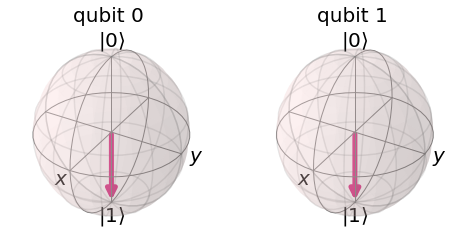

In [15]:
plot_bloch_multivector(orig_statevec)

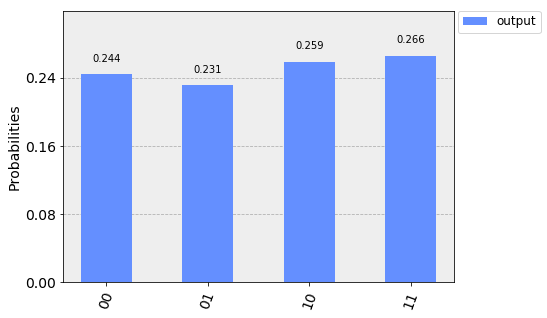

In [16]:
c = q.QuantumCircuit(2,2)
c.h(0)
c.h(1)
c.x(0)
c.x(1)
statevec = q.execute(c, backend=statevec_sim).result().get_statevector()
c.measure([0,1], [0,1]) # measuring qubit 3, which is impacted by those cnots:
counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts], legend=['output'])

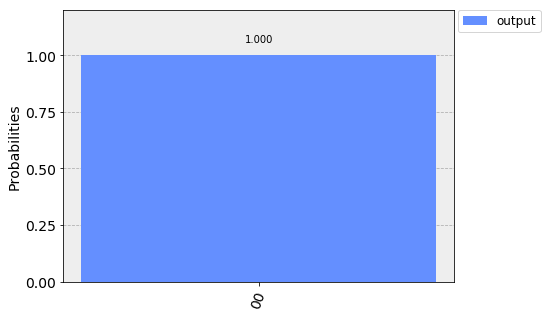

In [17]:
c = q.QuantumCircuit(2,2)
c.h(0)
c.h(1)
c.x(0)
c.x(1)
c.h(0)
c.h(1)
statevec = q.execute(c, backend=statevec_sim).result().get_statevector()
c.measure([0,1], [0,1]) # measuring qubit 3, which is impacted by those cnots:
counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts], legend=['output'])

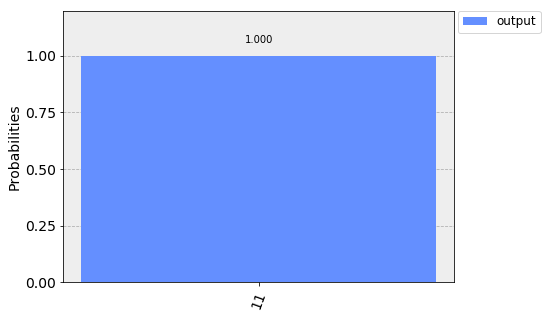

In [18]:
plot_histogram([orig_counts], legend=['output'])

In [19]:
def balanced_black_box(c):
    c.cx(0,2)
    c.cx(1,2)
    return c
    
def constant_black_box(c):
    # outputs whatever you put in. 
    return c

In [20]:
c = q.QuantumCircuit(3,2)
c = balanced_black_box(c)
c.draw()

In [21]:
c = q.QuantumCircuit(3,2)
c.h(0)
c.h(1)
c.h(2)
c = balanced_black_box(c)
c.h(0)
c.h(1)
# no need for ending H on q[2]
c.draw()

In [22]:
c = q.QuantumCircuit(3,2)
c.h(0)
c.h(1)
c.h(2)
c.barrier()
c = balanced_black_box(c)
c.barrier()
c.h(0)
c.h(1)
# no need for ending H on q[2]
c.draw()

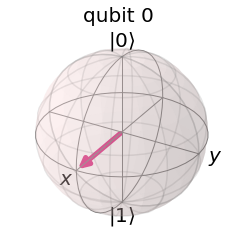

In [23]:
c = q.QuantumCircuit(1,1)
c.h(0)
statevec = q.execute(c, backend=statevec_sim).result().get_statevector()
plot_bloch_multivector(statevec)

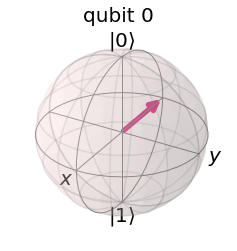

In [24]:
c = q.QuantumCircuit(1,1)
c.x(0)
c.h(0)
statevec = q.execute(c, backend=statevec_sim).result().get_statevector()
plot_bloch_multivector(statevec)

In [25]:
c = q.QuantumCircuit(3,2)
c.x(2)  # adding this not gate
c.barrier() # barrier for clarity
c.h(0)
c.h(1)
c.h(2)
c.barrier()
c = balanced_black_box(c)
c.barrier()
c.h(0)
c.h(1)
# no need for ending H on q[2]... even though it'd make the sandwich look better :(
c.draw()

In [26]:
c = q.QuantumCircuit(3,2)
c.x(2)  # adding this not gate
c.barrier() # barrier for clarity
c.h(0)
c.h(1)
c.h(2)
c.barrier()
c = balanced_black_box(c)
c.barrier()
c.h(0)
c.h(1)
c.measure([0,1],[0,1])
# no need for ending H on q[2]... even though it'd make the sandwich look better :(
c.draw()

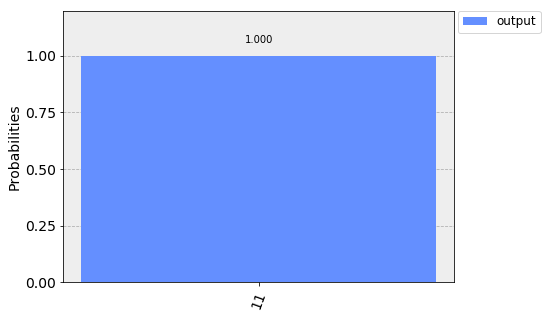

In [27]:
counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts], legend=['output'])

In [28]:
c = q.QuantumCircuit(3,2)
c.x(2)
c.barrier()
c.h(0)
c.h(1)
c.h(2)
c.barrier()
c = constant_black_box(c)  # changed to constant box.
c.barrier()
c.h(0)
c.h(1)
c.measure([0,1],[0,1])
c.draw()

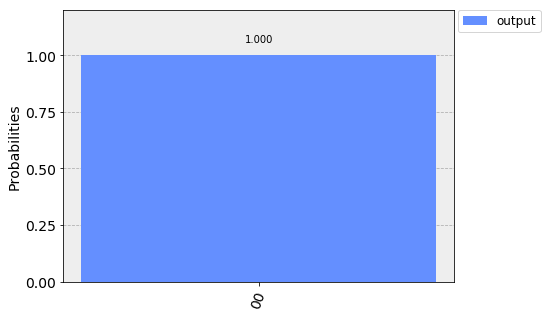

In [29]:
counts = q.execute(c, backend=qasm_sim, shots=1024).result().get_counts()
plot_histogram([counts], legend=['output'])

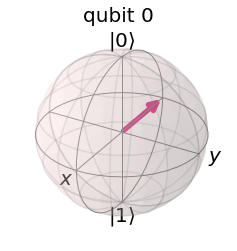

In [30]:
c = q.QuantumCircuit(1,1)
c.x(0)
c.h(0)

statevec = q.execute(c, backend=statevec_sim).result().get_statevector()
plot_bloch_multivector(statevec)

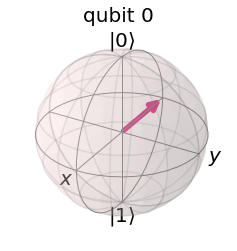

In [31]:
c = q.QuantumCircuit(1,1)
c.ry(math.pi,0)
c.h(0)

statevec = q.execute(c, backend=statevec_sim).result().get_statevector()
plot_bloch_multivector(statevec)